# <center>服务器日志数据分析</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## 1、将数据导⼊入pandas中，加上列列名

In [2]:
data = pd.read_table('log.txt', header=None, names=['id', 'api', 'count', 'res_time_sum', 'res_time_min', 'res_time_max', 'res_time_avg', 'interval', 'created_at'])
data.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07


## 2、检测是否有重复值

In [3]:
data.duplicated().sum()

0

#### 结论：无重复值

## 3、检测是否有异常值

In [4]:
data.describe()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval
count,1.794960e+05,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000,179496.0
mean,6.866490e+06,7.175909,1393.177370,108.419620,359.880351,187.812208,60.0
std,3.686579e+06,4.325160,1499.485881,79.640559,638.919769,224.464813,0.0
min,1.625420e+05,1.000000,36.550000,3.210000,36.550000,36.000000,60.0
25%,3.825183e+06,4.000000,607.707500,83.410000,198.280000,144.000000,60.0
50%,6.811432e+06,7.000000,1154.905000,97.120000,256.090000,167.000000,60.0
75%,9.981397e+06,10.000000,1834.117500,116.990000,374.410000,202.000000,60.0
max,1.343909e+07,31.000000,142650.550000,18896.640000,142468.270000,71325.000000,60.0


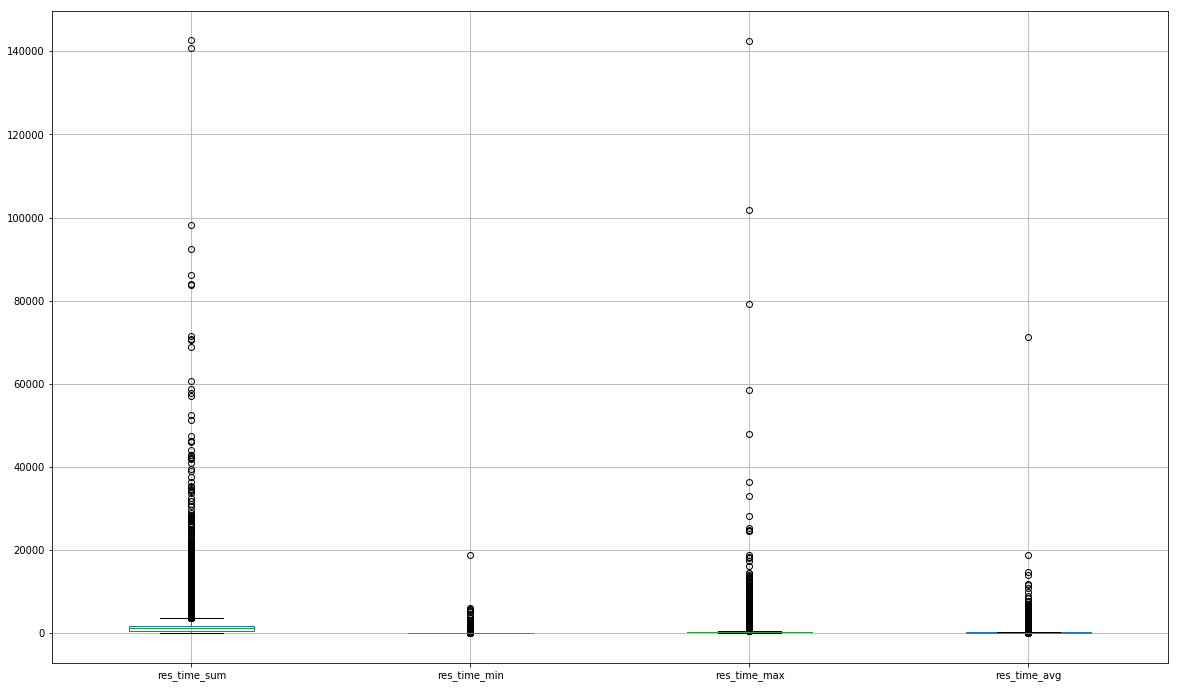

In [5]:
plt.figure(figsize=(20, 12))
data[['res_time_sum', 'res_time_min', 'res_time_max', 'res_time_avg']].boxplot()
plt.show()

#### 结论：从上面表格和箱线图来看，res_time_sum、res_time_min、res_time_max、res_time_avg这四个存在异常值

## 4、分析api和interval这两列的数据是否对分析有用，如果⽆⽤，说明为什么要将这两列丢弃

In [6]:
len(data[data['api']!='/front-api/bill/create'])

0

表明所有数据的 api 都是 /front-api/bill/create 

In [7]:
len(data[data['interval']!=60])

0

表明所有数据的 interval 都是 60

#### 结论：因为整个数据集中这两列的数据都相同，且和其他列无关联，所以无用，可以丢弃。

## 5. 使用created_at这⼀列的数据作为时间索引

In [8]:
# 这里不能使用set_index，使用set_index后index是str对象，而不是timestamp，后面画图时无法显示x轴的标注
s = pd.to_datetime(data.created_at) 
s.head()
data.index = s

#### 上面这一步至关重要！！！

In [9]:
data.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2017-11-01 00:00:07,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
2017-11-01 00:01:07,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2017-11-01 00:02:07,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
2017-11-01 00:03:07,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
2017-11-01 00:04:07,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07


In [10]:
data.tail()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2018-05-30 23:06:21,13438800,/front-api/bill/create,11,2783.48,99.24,489.90,253.0,60,2018-05-30 23:06:21
2018-05-30 23:07:21,13438866,/front-api/bill/create,10,1951.10,85.37,529.51,195.0,60,2018-05-30 23:07:21
2018-05-30 23:08:21,13438917,/front-api/bill/create,3,494.17,103.95,211.47,164.0,60,2018-05-30 23:08:21
2018-05-30 23:09:21,13438981,/front-api/bill/create,9,1798.28,101.11,433.30,199.0,60,2018-05-30 23:09:21
2018-05-30 23:10:21,13439086,/front-api/bill/create,6,1017.97,74.45,298.97,169.0,60,2018-05-30 23:10:21


## 6. 分析api调用次数情况

In [11]:
df = data['2018-05-20 00:00:00' : '2018-05-20 23:59:59']   # 取2018-05-29一天的数据
df.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2018-05-20 00:00:10,12686322,/front-api/bill/create,5,1136.77,150.77,400.61,227.0,60,2018-05-20 00:00:10
2018-05-20 00:01:10,12686411,/front-api/bill/create,3,553.82,165.71,219.99,184.0,60,2018-05-20 00:01:10
2018-05-20 00:02:10,12686488,/front-api/bill/create,3,559.27,139.82,259.43,186.0,60,2018-05-20 00:02:10
2018-05-20 00:03:10,12686558,/front-api/bill/create,5,947.08,119.61,269.42,189.0,60,2018-05-20 00:03:10
2018-05-20 00:04:10,12686635,/front-api/bill/create,6,1081.21,138.63,241.77,180.0,60,2018-05-20 00:04:10


In [12]:
df.tail()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2018-05-20 23:55:11,12755831,/front-api/bill/create,5,1249.44,141.59,346.02,249.0,60,2018-05-20 23:55:11
2018-05-20 23:56:11,12755902,/front-api/bill/create,5,855.73,120.08,194.33,171.0,60,2018-05-20 23:56:11
2018-05-20 23:57:11,12755949,/front-api/bill/create,6,1227.75,74.60,312.44,204.0,60,2018-05-20 23:57:11
2018-05-20 23:58:11,12756051,/front-api/bill/create,5,678.46,86.67,218.59,135.0,60,2018-05-20 23:58:11
2018-05-20 23:59:11,12756118,/front-api/bill/create,6,1284.77,101.39,347.52,214.0,60,2018-05-20 23:59:11


In [13]:
df.index[0]

Timestamp('2018-05-20 00:00:10')

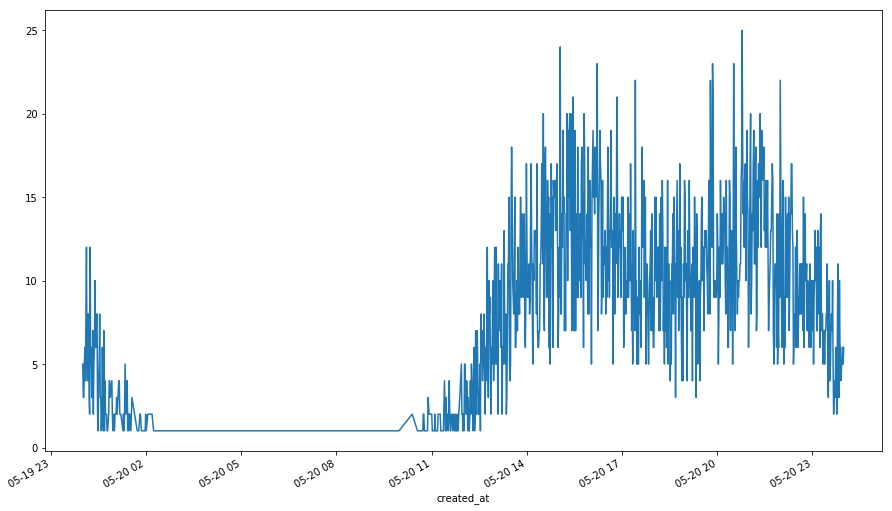

In [14]:
plt.figure(figsize=(15, 9))
df['count'].plot() 
plt.show()

#### 结论：根据上图分析，从凌晨2点到11点访问少，业务高峰在现下午2点到5点、晚上8点到10点

## 7、分析⼀天中api响应时间

下面这个不知道为什么 plt.figure(figsize=(15, 9)) 设置无效

<Figure size 1080x648 with 0 Axes>

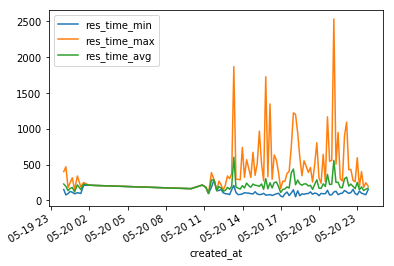

In [15]:
plt.figure(figsize=(15, 9))           
df2 = df[::10]  # 每隔十分钟取一次数据
df2[[ 'res_time_min', 'res_time_max','res_time_avg']].plot() 
plt.show()

#### 结论：在业务⾼峰时间段，最大响应时间和平均响应时间都有所上升

## 8. 分析连续的几天数据

In [16]:
df3 = data['2018-05-12' : '2018-05-20']   # 取2018-05-29一天的数据，且每隔10分钟取一次数据
df3.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2018-05-12 00:00:01,12143170,/front-api/bill/create,13,3340.61,61.82,758.07,256.0,60,2018-05-12 00:00:01
2018-05-12 00:01:01,12143256,/front-api/bill/create,6,1287.80,124.29,344.26,214.0,60,2018-05-12 00:01:01
2018-05-12 00:02:01,12143360,/front-api/bill/create,4,941.29,112.89,367.51,235.0,60,2018-05-12 00:02:01
2018-05-12 00:03:01,12143431,/front-api/bill/create,5,1075.60,95.55,389.41,215.0,60,2018-05-12 00:03:01
2018-05-12 00:04:01,12143511,/front-api/bill/create,4,1164.78,134.69,605.19,291.0,60,2018-05-12 00:04:01


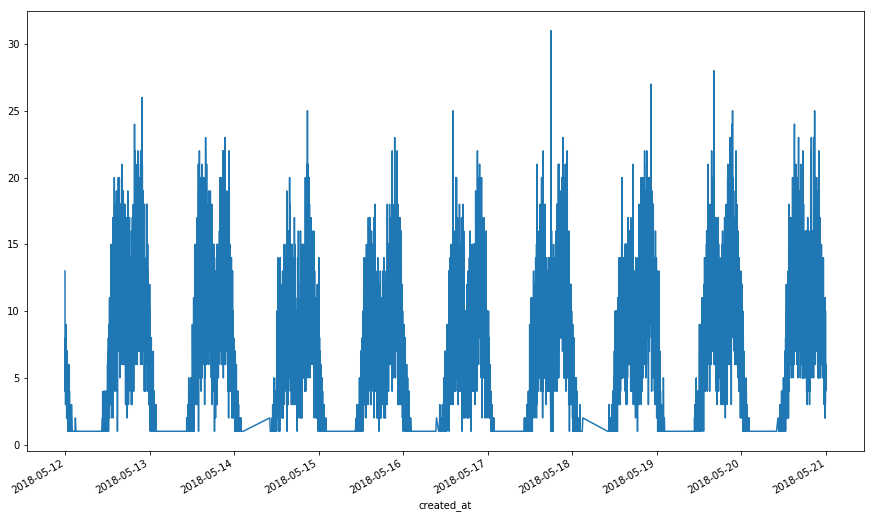

In [17]:
plt.figure(figsize=(15,9))
df3['count'].plot()
plt.show()

#### 结论：每天的业务高峰时段都比较相似

## 9. 分析周末访问量是否有增加

In [18]:
time = df.index[0].strftime('%Y-%m-%d %H:%M:%S')
time

'2018-05-20 00:00:10'

In [19]:
df.index[0]

Timestamp('2018-05-20 00:00:10')

In [20]:
df4 = df[::30]    # 隔30分钟取一次数据
df4.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2018-05-20 00:00:10,12686322,/front-api/bill/create,5,1136.77,150.77,400.61,227.0,60,2018-05-20 00:00:10
2018-05-20 00:30:10,12688476,/front-api/bill/create,4,665.14,123.40,244.76,166.0,60,2018-05-20 00:30:10
2018-05-20 01:04:10,12690617,/front-api/bill/create,3,649.72,106.73,339.61,216.0,60,2018-05-20 01:04:10
2018-05-20 01:58:10,12693151,/front-api/bill/create,1,212.45,212.45,212.45,212.0,60,2018-05-20 01:58:10
2018-05-20 10:51:11,12699445,/front-api/bill/create,1,213.11,213.11,213.11,213.0,60,2018-05-20 10:51:11


In [21]:
df4.index[0].weekday()+1

7

上面返回7，表示是周日

In [22]:
df5 = data['2018-05-22 00:00:00' : '2018-05-22 23:59:59' : 30]
df5.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,,
2018-05-22 00:00:12,12823343,/front-api/bill/create,6,1257.16,92.11,289.67,209.0,60,2018-05-22 00:00:12
2018-05-22 00:31:12,12825531,/front-api/bill/create,3,645.92,189.54,239.19,215.0,60,2018-05-22 00:31:12
2018-05-22 01:03:12,12827356,/front-api/bill/create,2,421.44,131.02,290.42,210.0,60,2018-05-22 01:03:12
2018-05-22 01:40:12,12829288,/front-api/bill/create,1,239.38,239.38,239.38,239.0,60,2018-05-22 01:40:12
2018-05-22 10:38:13,12835864,/front-api/bill/create,1,68.70,68.70,68.70,68.0,60,2018-05-22 10:38:13


In [23]:
df5.index[0].weekday()+1

2

上面返回2，表示是周二

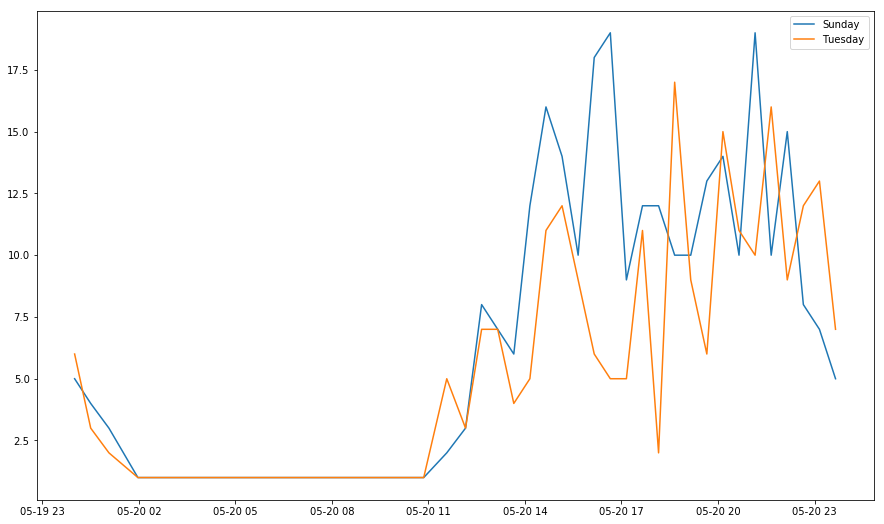

In [24]:
plt.figure(figsize=(15, 9))
plt.plot(df4.index, df4['count'], label='Sunday')
plt.plot(df4.index, df5['count'], label='Tuesday')
plt.legend()
plt.show()

#### 结论：周末的下午和晚上，⽐⾮周末访问量多一些